In [3]:
import pandas as pd
from scipy.stats import ttest_ind, levene, mannwhitneyu,shapiro, \
    f_oneway, kruskal, chi2_contingency, fisher_exact
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
import pingouin as pg
from statsmodels.graphics.mosaicplot import mosaic

#pd.set_option('display.max_rows', None)  # Отображение всех строк  
pd.set_option('display.max_columns', None)  # Отображение всех столбцов  

In [12]:
dtp = pd.read_csv('dtp_clear.csv')
dtp

,REGION,DATE,COORD_L,COORD_W,road_name,road_category,n_VEHICLES,n_PARTICIPANTS,ID,n_DEATHS,n_INJURED,vehicle_failure,non_private_vehicle,russian_vehicle,white_vehicle,black_vehicle,colored_vehicle,drunk_driver,female_driver,escaped,no_seatbelt_injury,n_drunk,n_children,n_cyclists,n_pedestrians,vehicle_age_min,vehicle_age_max,vehicle_age_avg,n_class_a,n_class_b,n_class_c,n_class_d,n_class_e,n_class_s,n_front_drive,n_rear_drive,n_4wd,n_guilty,guilty_share,n_fatal_violations,guilty_exp_avg,exp_avg,road_rank_cat,road_defects_cat,traffic_changes_bin,traffic_changes_cat,road_surface_cat,TYPE_cat,out_of_town,street_rank_cat,weather_interpretable,weather_cat,adj_objects_interpretable,adj_objects_cat,cause_factors_cat,crossing_violation,impaired_driving,interference_violation,license_violation,maneuver_violation,other_violation,pedestrian_violation,sudden_appearance_violation,traffic_control_violation,transport_violation,vehicle_tech_violation,wrong_way,no_lighting,lighting_cat,site_objects_cat,severity,YEAR,MONTH,WEEKDAY,SEASON,is_WEEKEND,HOUR,is_NIGHT,is_PEAK_HOUR,vehicle_age_min_2
0,1,31.01.2015,81.151944,53.740000,Романово - Завьялово - Баево - Камень-на-Оби,5.0,1,3,161242174,0,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,2003.0,2003.0,2003.0,0,1,0,0,0,0,0,0,0,1,1.0,4,17.0,17.0,3,5,0,2,7,7,1,0,nothing,5,no_obj,4,18,0,0,0,0,0,1,0,0,0,1,0,0,0,4,12,2,2015,1,5,1,1,9,0,1,12.0
1,1,30.01.2015,85.018056,51.684444,Куяган - Куяча - Тоурак,6.0,2,3,161105683,0,2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,2002.0,2004.0,2003.0,1,0,0,0,0,0,0,0,0,1,0.5,1,7.0,10.0,3,5,0,2,1,7,1,0,nothing,5,no_obj,4,18,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,2,2015,1,4,1,0,14,0,0,13.0
2,1,30.01.2015,81.250000,53.818056,Барнаул - Камень-на-Оби - граница Новосибирско...,5.0,2,3,161763431,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2005.0,2008.0,2006.5,0,1,0,0,0,0,0,0,0,1,0.5,1,2.0,15.5,3,5,0,2,7,7,1,0,nothing,5,no_obj,4,18,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,1,2015,1,4,1,0,17,0,1,10.0
3,1,24.01.2015,51.000000,84.000000,Быканов Мост - Солоновка - Солонешное - границ...,7.0,1,2,160331994,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,2000.0,2000.0,2000.0,0,1,0,0,0,0,0,0,0,1,1.0,2,26.0,26.0,3,5,0,2,1,7,1,0,nothing,5,no_obj,4,18,0,1,0,0,0,0,0,0,1,0,0,0,1,2,12,1,2015,1,5,1,1,19,0,0,15.0
4,1,23.01.2015,84.000000,53.000000,Быканов Мост - Солоновка - Солонешное - границ...,7.0,1,2,160213415,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2003.0,2003.0,2003.0,0,1,0,0,0,0,0,0,0,1,1.0,1,18.0,18.0,3,5,0,2,1,7,1,0,LOW_VISIBILITY,3,no_obj,4,18,0,0,0,0,0,0,0,0,0,0,0,1,1,2,12,3,2015,1,4,1,0,21,0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472694,10011,18.12.2022,55.731164,67.417464,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",5.0,1,1,222679998,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,2020.0,2020.0,2020.0,0,0,0,0,0,0,0,0,1,1,1.0,1,31.0,31.0,3,5,0,2,1,7,1,4,nothing,5,no_obj,4,18,0,0,0,0,0,0,0,0,0,0,0,1,1,2,3,3,2022,12,6,1,1,15,0,0,2.0
472695,10011,16.06.2024,54.095821,67.629532,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",6.0,1,2,223892751,0,2,0,0,0,0,1,0,1,0,0,1,2,0,0,0,2023.0,2023.0,2023.0,0,0,0,1,0,0,0,0,1,1,1.0,4,8.0,8.0,3,5,0,2,7,7,1,0,nothing,5,no_obj,4,18,0,0,0,0,0,0,0,0,1,1,0,0,0,0,12,1,2024,6,6,3,1,9,0,1,1.0
472696,10011,04.07.2024,53.607541,67.836463,Подъездная автомобильная дорога к п. Красное,1.0,1,1,223948754,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,2011.0,2011.0,2011.0,0,0,0,0,0,0,0,0,0,1,1.0,1,24.0,24.0,3,13,0,2,2,7,1,4,LOW_VISIBILITY,3,LIVING_OBJ,1,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,2,2024,7,3,3,0,9,0,1,13.0
472697,10011,25.08.2024,53.612724,67.837285,Подъездная автомобильная дорога к п. Красное,4.0,1,1,224161731,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,2024.0,2024.0,2024.0,0,0,0,0,0,0,0,0,0,1,1.0,4,95.0,95.0,3,5,0,2,7,4,1,4,nothing,5,SOCIAL_OBJ,3,18,0,0,0,1,0,1,0,0,1,1,0,0,0,0,12,1,2024,

In [5]:
contingency_table = pd.crosstab(dtp['out_of_town'], dtp['escaped'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table, correction=True)

print(f"X^2 Statistic: {chi2}")
print(f"P-value: {p}")
print("Ожидаемые значения:")
print(expected)

Contingency Table:
escaped           0      1
out_of_town               
0             30160   2839
1            417635  22065
X^2 Statistic: 789.7699613336403
P-value: 9.042187234590508e-174
Ожидаемые значения:
[[ 31260.45793412   1738.54206588]
 [416534.54206588  23165.45793412]]


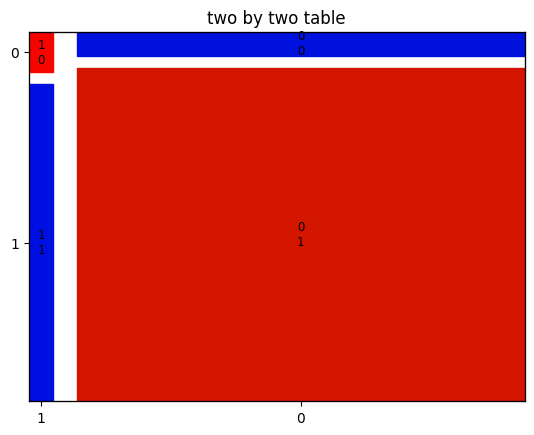

In [6]:
mosaic(data = dtp, index = ['escaped', 'out_of_town'], gap=0.05, title='two by two table', statistic=True)
plt.show()

In [14]:
contingency_table = pd.crosstab(dtp.loc[dtp.n_cyclists > 0, 'escaped'], dtp.loc[dtp.n_cyclists > 0, 'out_of_town'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table, correction=True)

print(f"X^2 Statistic: {chi2}")
print(f"P-value: {p}")
print("Ожидаемые значения:")
print(expected)

Contingency Table:
out_of_town     0     1
escaped                
0            1162  6014
1             186  1090
X^2 Statistic: 1.9918161331515984
P-value: 0.15815111615319313
Ожидаемые значения:
[[1144.4921912 6031.5078088]
 [ 203.5078088 1072.4921912]]


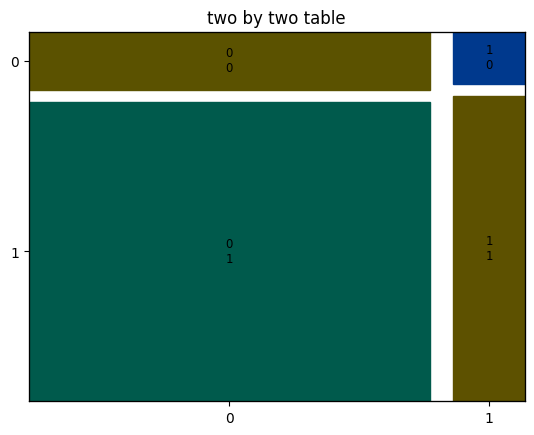

In [17]:
mosaic(data = dtp.loc[dtp.n_cyclists > 0], index = ['escaped', 'out_of_town'], gap=0.05, title='two by two table', statistic=True)
plt.show()

In [15]:
contingency_table = pd.crosstab(dtp.loc[dtp.n_PARTICIPANTS == 1, 'escaped'], dtp.loc[dtp.n_PARTICIPANTS == 1, 'out_of_town'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table, correction=True)

print(f"X^2 Statistic: {chi2}")
print(f"P-value: {p}")
print("Ожидаемые значения:")
print(expected)

Contingency Table:
out_of_town     0      1
escaped                 
0            3188  73361
1              84   1431
X^2 Statistic: 6.704754740630666
P-value: 0.009615615573225243
Ожидаемые значения:
[[3.20849980e+03 7.33405002e+04]
 [6.35002050e+01 1.45149980e+03]]


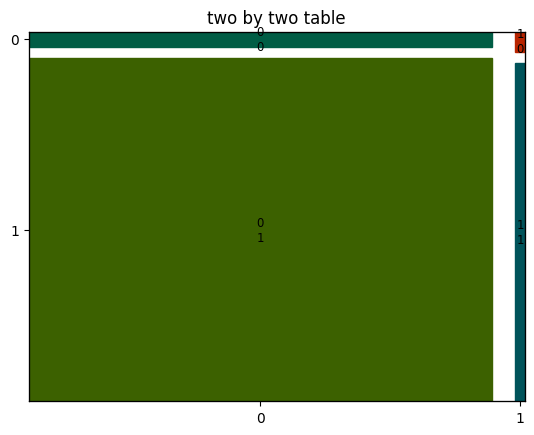

In [16]:
mosaic(data = dtp.loc[dtp.n_PARTICIPANTS == 1], index = ['escaped', 'out_of_town'], gap=0.05, title='two by two table', statistic=True)
plt.show()

In [23]:
dtp_without = dtp.loc[(dtp.n_PARTICIPANTS > 1) & (dtp.n_cyclists == 0)]

In [24]:
contingency_table = pd.crosstab(dtp_without['escaped'], dtp_without['out_of_town'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table, correction=True)

print(f"X^2 Statistic: {chi2}")
print(f"P-value: {p}")
print("Ожидаемые значения:")
print(expected)

Contingency Table:
out_of_town      0       1
escaped                   
0            25810  338263
1             2569   19544
X^2 Statistic: 627.2042926810097
P-value: 2.0270487393545953e-138
Ожидаемые значения:
[[ 26754.01922131 337318.98077869]
 [  1624.98077869  20488.01922131]]


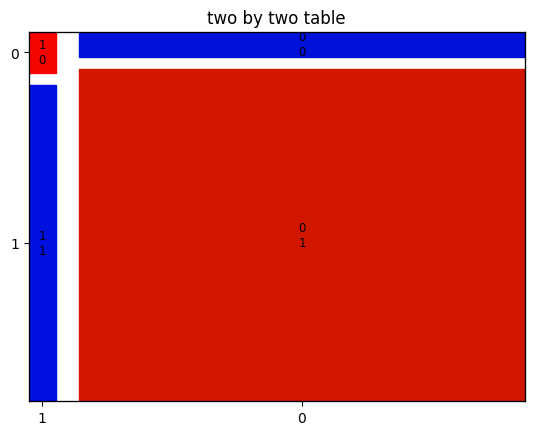

In [25]:
mosaic(data = dtp_without, index = ['escaped', 'out_of_town'], gap=0.05, title='two by two table', statistic=True)
plt.show()

In [13]:
dtp['severity_1'] = dtp['severity'].copy()
dtp['severity_1'] = dtp['severity_1'].apply(lambda x: 1 if x == 1 else 0)
dtp['severity_2'] = dtp['severity'].copy()
dtp['severity_2'] = dtp['severity_2'].apply(lambda x: 1 if x == 2 else 0)

In [8]:
def check_logistic_regression(data, target, predictors):
    X = data[predictors]
    y = data[target]
    X = sm.add_constant(X)  # Добавление константы для модели
    
    # Строим модель
    model = sm.Logit(y, X).fit()
    print(model.summary())
    
    # 1. ROC-кривая и AUC
    predicted_probs = model.predict(X)
    auc = roc_auc_score(y, predicted_probs)
    print(f"AUC Score: {auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y, predicted_probs)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # 2. Проверка мультиколлинеарности (VIF)
    vif_data = pd.DataFrame()
    vif_data["Predictor"] = predictors
    vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(len(predictors))]
    print(vif_data)
    
    # 3. Проверка линейности логитов (Box-Tidwell Test)
    X_log = np.log(X.drop('const', axis=1) + 1e-6)
    interaction = X.drop('const', axis=1) * X_log
    X_with_interactions = pd.concat([X, interaction], axis=1)
    
    model_interaction = sm.Logit(y, X_with_interactions).fit()
    print(model_interaction.summary())

    #ODDS
    odds_ratios = pd.DataFrame({
    'Predictor': ['const'] + predictors,
    'OR': np.exp(model.params),
    'CI_lower': np.exp(model.conf_int()[0]),
    'CI_upper': np.exp(model.conf_int()[1])
    })
    print("\nOdds Ratios:")
    print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.196076
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                escaped   No. Observations:               472699
Model:                          Logit   Df Residuals:                   472687
Method:                           MLE   Df Model:                           11
Date:                Sat, 13 Dec 2025   Pseudo R-squ.:                 0.04977
Time:                        07:53:42   Log-Likelihood:                -92685.
converged:                       True   LL-Null:                       -97539.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4084      0.033    -73.457      0.000      -2.473      -2.344
severity

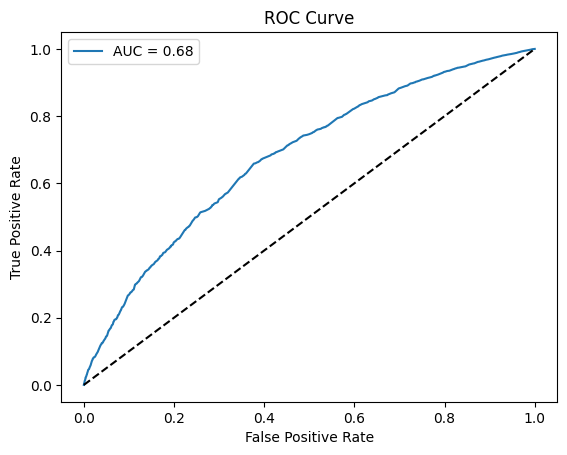

            Predictor       VIF
0          severity_1  2.173292
1          severity_2  2.107403
2         out_of_town  1.013708
3        drunk_driver  1.050342
4       female_driver  1.029785
5         no_lighting  1.223532
6        is_PEAK_HOUR  1.125059
7          is_WEEKEND  1.007556
8            is_NIGHT  1.328414
9   license_violation  1.053508
10     n_PARTICIPANTS  1.031479
Optimization terminated successfully.
         Current function value: 0.193315
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                escaped   No. Observations:               472699
Model:                          Logit   Df Residuals:                   472686
Method:                           MLE   Df Model:                           12
Date:                Sat, 13 Dec 2025   Pseudo R-squ.:                 0.06315
Time:                        07:53:56   Log-Likelihood:                -91380.
converged:                       True   

In [11]:
check_logistic_regression(dtp, 'escaped', ['severity_1', 'severity_2', 'out_of_town', 'drunk_driver', 'female_driver', 'no_lighting', 'is_PEAK_HOUR', 'is_WEEKEND', 'is_NIGHT', 'license_violation', 'n_PARTICIPANTS'])

In [18]:
dtp['escaped'] = dtp['escaped'].astype('str')
dtp['severity'] = dtp['severity'].astype('str')

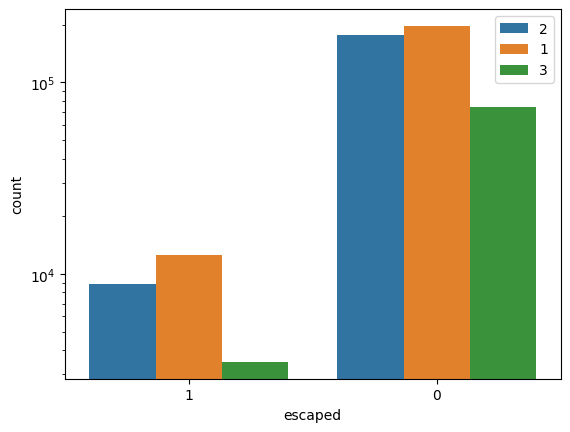

In [19]:
ax = sns.countplot(data = dtp, x = 'escaped', hue = 'severity')
ax.set_yscale('log')
ax.legend()